In [2]:
%cd ..
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import preprocessing as pr

/Users/kemalcankucuk/Documents/kuis-matam-summerproject/gps_timeseries


# Initialization

In [3]:
parent_path = '../geodesy_data'
pre = pr.Preprocessor(parent_path)

In [4]:
# load 5 percent of the available tenv files as df
tenvs = pre.load_tenv_file_df(pre.tenvs)

# Plotting

In [5]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

def plot_eqmarkers(stat):
    """
    Plot 3x3 grid of Delta E, Delta N, and Delta V showing raw data, first derivative, and peaks.

    Args:
        stat (str): Station name.
    """
    sample = pre.read_tenv_file(stat + '.tenv')
    tenvs = [sample]
    gap_tolerance = 220
    filtered_tenvs, stations_with_gaps = pre.apply_filtering(tenvs, gap_tolerance=gap_tolerance)
    sample = filtered_tenvs[0]
    
    # Normalize Delta N
    sample['Delta N'] = (sample['Delta N'] - sample['Delta N'].mean()) / (sample['Delta N'].std() + 1e-7)
    
    # Find peaks for Delta N
    const = 0.05
    diff = np.diff(sample['Delta N'])
    diff = np.concatenate(([0], diff))
    thr = (diff.max() - diff.min()) * const
    peaks, _ = find_peaks(diff, height=thr)
    
    # Create subplots
    fig, axs = plt.subplots(3, 3, figsize=(15, 5), sharex=False)
    
    # Titles for the subplots
    directions = ['Delta E', 'Delta N', 'Delta V']
    aspects = ['Raw Data', 'First Derivative', 'Peaks']

    # Set common x-axis limits for consistency
    x_limits = [sample['Date'].min(), sample['Date'].max()]
    
    # Plot each direction in the rows
    for i, direction in enumerate(directions):
        if direction == 'Delta E':
            data = sample['Delta E']
        elif direction == 'Delta N':
            data = sample['Delta N']
        elif direction == 'Delta V':
            data = sample['Delta V']

        # Raw Data
        axs[i, 0].scatter(sample['Date'], data, s=5)
        axs[i, 0].set_title(f'{stat} - {direction} - {aspects[0]}')
        axs[i, 0].set_ylabel(direction)
        axs[i, 0].set_xlim(x_limits)
        axs[i, 0].set_ylim(data.min(), data.max())

        # First Derivative
        first_derivative = np.diff(data)
        axs[i, 1].plot(first_derivative)
        axs[i, 1].set_title(f'{stat} - {direction} - {aspects[1]}')
        axs[i, 1].set_ylim(first_derivative.min(), first_derivative.max())

        # Peaks
        axs[i, 2].scatter(sample['Date'], data, s=5)
        axs[i, 2].scatter(sample['Date'].iloc[peaks], data.iloc[peaks], color='red', marker='x', label='Peaks')
        axs[i, 2].set_title(f'{stat} - {direction} - {aspects[2]}')
        axs[i, 2].set_xlim(x_limits)
        axs[i, 2].set_ylim(data.min(), data.max())
        axs[i, 2].legend(loc='lower right')
    
    for ax in axs.flat:
        ax.label_outer()

    plt.tight_layout()
    plt.show()

# Example usage:

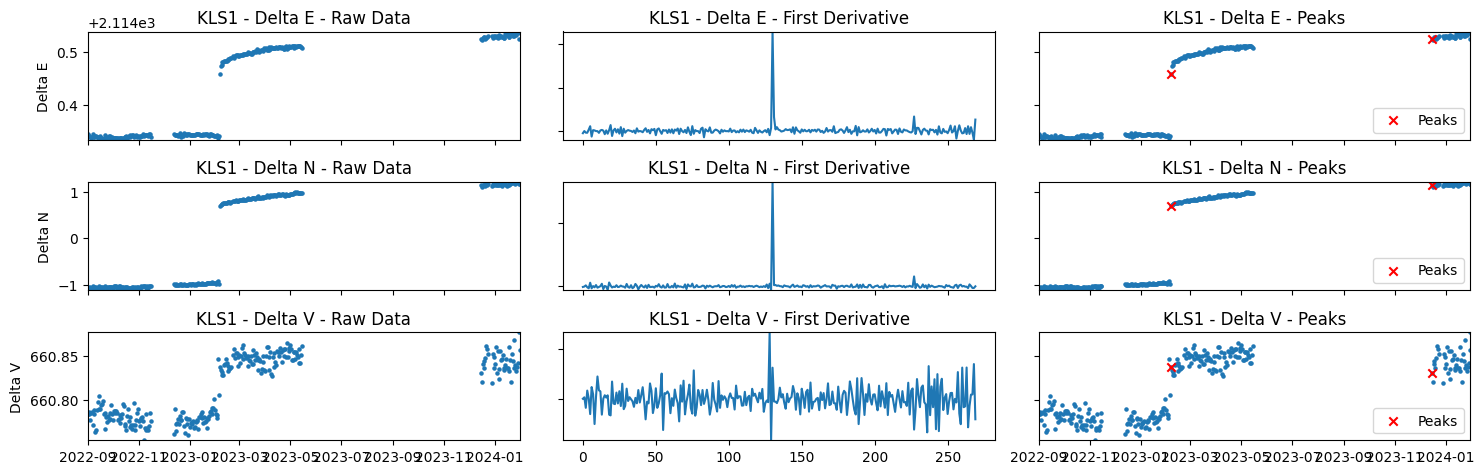

In [6]:
plot_eqmarkers('KLS1')

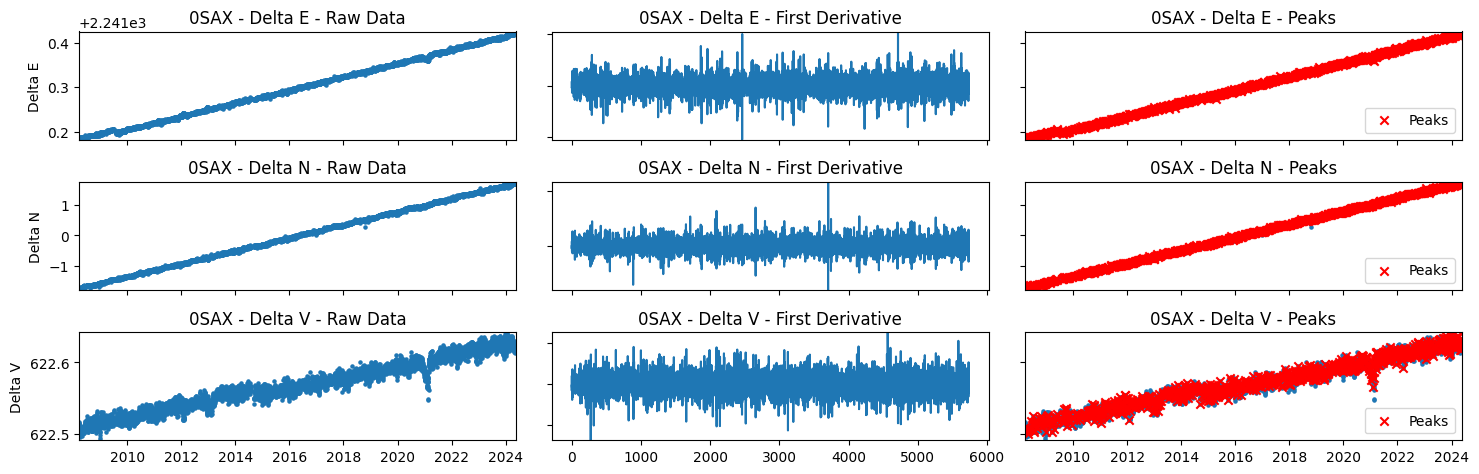

In [7]:
plot_eqmarkers('0SAX')